In [3]:
import numpy as np
from numpy import random as rnd
from matplotlib import pyplot as plt
import warnings,itertools,time,datetime,os

import torch
import pandas as pd

from keras.models import Model,Sequential
from keras.layers import Dense,Conv2D,LSTM,BatchNormalization,Input,concatenate,Activation,Dropout,Conv2DTranspose,Bidirectional

In [21]:
alpha = np.arange(1,51,1)

In [22]:
alpha

array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34,
       35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50])

In [23]:
beta = np.arange(0,51,1)

In [24]:
beta

array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
       17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
       34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50])

In [32]:
df = pd.DataFrame(list(itertools.product(alpha,beta))).rename(columns={0:'a',1:'b'})

In [35]:
df['t(a,b)'] = df.apply(lambda x: (9888*x[0] + (28 + 12*x[0] + 4*x[1]))/(20*(7 + 3*x[0] - x[1])),axis=1)

C:\Users\Jan\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: RuntimeWarning: divide by zero encountered in longlong_scalars
  """Entry point for launching an IPython kernel.


In [45]:
df['T_order'] = df.apply(lambda x: 7 + 3*x[0] - x[1],axis=1)

In [48]:
df = df[df['T_order']>0].reset_index(drop=True)

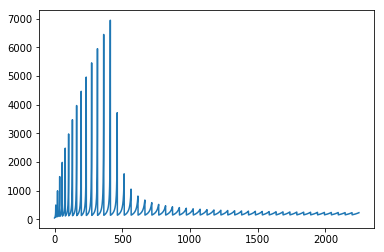

In [50]:
df['t(a,b)'].plot()

In [51]:
df.sort_values(by='t(a,b)')

,a,b,"t(a,b)",T_order
0,1,0,49.640000,10.0
1,1,1,55.177778,9.0
2,1,2,62.100000,8.0
3,1,3,71.000000,7.0
10,2,0,76.261538,13.0
...,...,...,...,...
234,10,36,4958.600000,1.0
274,11,39,5454.200000,1.0
317,12,42,5949.800000,1.0
363,13,45,6445.400000,1.0
